# *Import Libraries*

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# *Exercise 1: Harris Corner Detection*

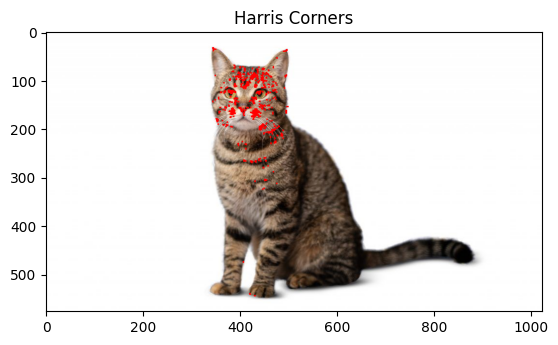

In [2]:
# Load and convert image to grayscale
img = cv2.imread('cat.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Harris Corner Detection
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Result is dilated for marking the corners
dst = cv2.dilate(dst, None)

# Mark corners in red
img[dst > 0.01 * dst.max()] = [0, 0, 255]

# Display the image with corners
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corners')
plt.show()



# *Exercise 2: HOG (Histogram of Oriented Gradients) Feature Extraction*

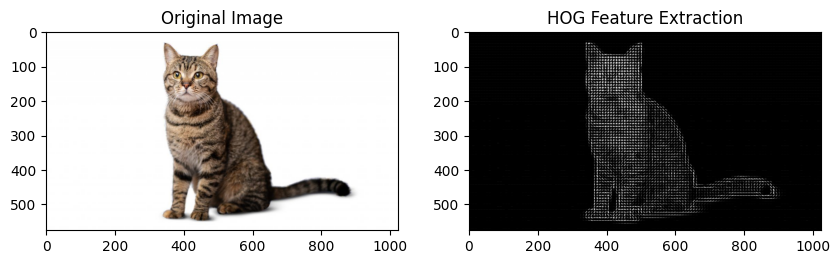

In [8]:
# Load and convert image to grayscale
img = cv2.imread('cat.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply HOG descriptor to extract features
features, hog_img = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), visualize=True, channel_axis=None)

# Rescale the HOG image for better visualization
hog_rescaled = exposure.rescale_intensity(hog_img, in_range=(0, 10))

# Display the original image and HOG visualization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(hog_rescaled, cmap='gray')
plt.title('HOG Feature Extraction')
plt.show()

# *Exercise 3: FAST (Features from Accelerated Segment Test) Keypoint Detection*

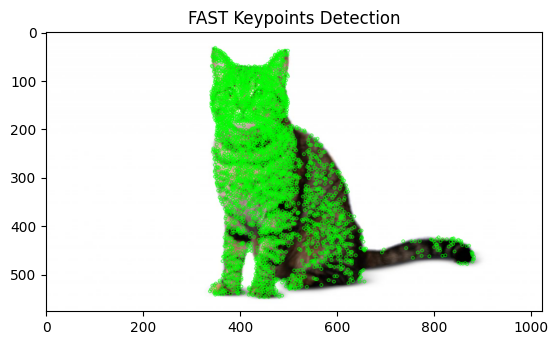

In [9]:
# Load and convert image to grayscale
img = cv2.imread('cat.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply FAST keypoint detector
fast = cv2.FastFeatureDetector_create()
keypoints = fast.detect(gray, None)

# Draw keypoints on the image
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, color=(0, 255, 0))

# Display the image with keypoints
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('FAST Keypoints Detection')
plt.show()

# *Exercise 4: Feature Matching using ORB and FLANN*

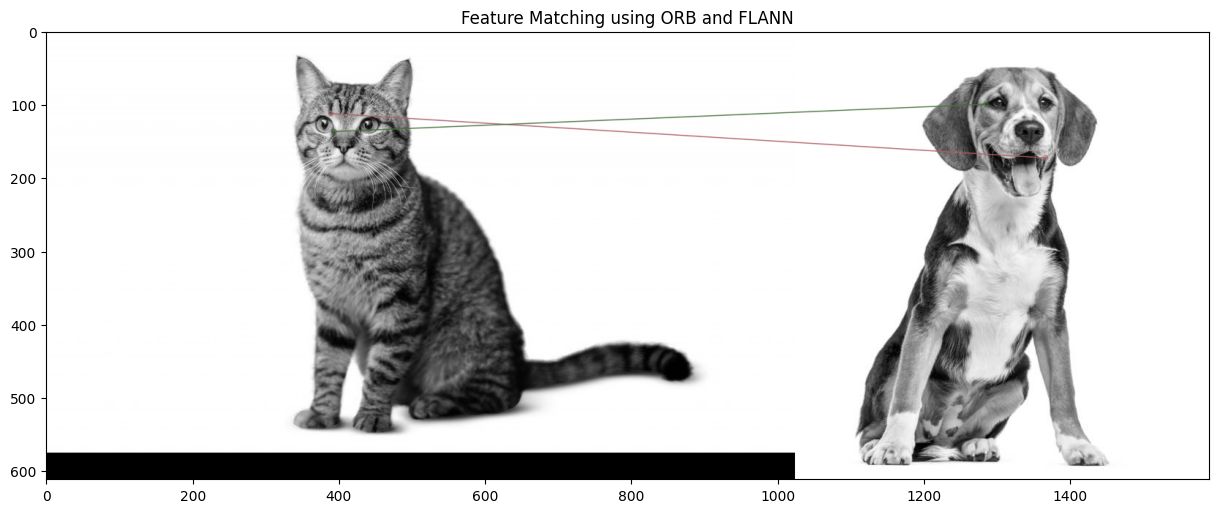

In [11]:
# Load two images
img1 = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('dog.jpg', cv2.IMREAD_GRAYSCALE)

# ORB detector
orb = cv2.ORB_create()

# Find keypoints and descriptors with ORB
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

# FLANN parameters
FLANN_INDEX_LSH = 6
index_params = dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1)
search_params = dict(checks=50)

# Use FLANN-based matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(descriptors1, descriptors2, k=2)


# Apply ratio test to filter good matches
good_matches = []
for match in matches:  # Iterate through each match
    if match:  # Check if match is not empty
        m, n = match  # Unpack if match has at least two elements
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

# Draw matched features
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display matched features
plt.figure(figsize=(15, 8))
plt.imshow(img_matches)
plt.title('Feature Matching using ORB and FLANN')
plt.show()

# *Exercise 5: Image Segmentation using Watershed Algorithm*

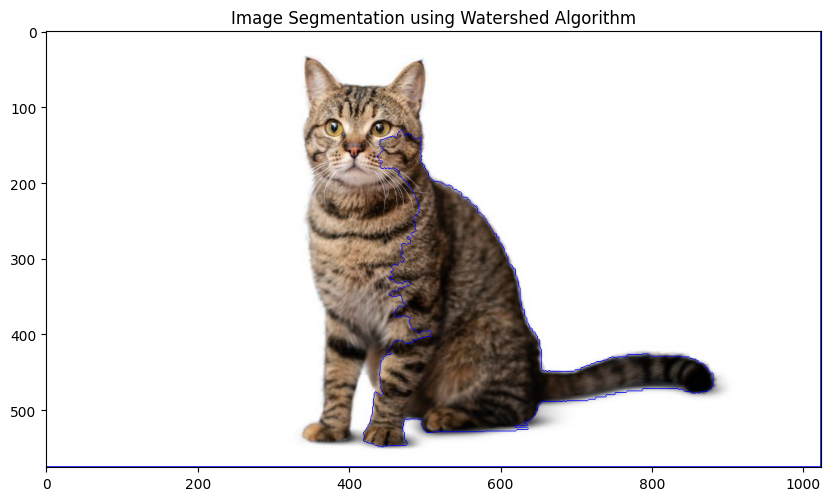

In [12]:
# Load an image
image = cv2.imread('cat.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a threshold to convert the image to binary
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Remove noise through morphological operations
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

# Define background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Define the foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Unknown region (border)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Label markers for watershed
_, markers = cv2.connectedComponents(sure_fg)

# Add 1 to all markers to distinguish background (set it to 1)
markers = markers + 1

# Mark the unknown region as 0
markers[unknown == 255] = 0

# Apply Watershed algorithm
markers = cv2.watershed(img, markers)

# Mark boundaries in red
img[markers == -1] = [255, 0, 0]

# Display the segmented image
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image Segmentation using Watershed Algorithm')
plt.show()